## Comparing Bayesian Models: The Widely Applicable Information Criterion
   
The Widely Applicable Information Criterion (WAIC) is an information criterion (such as AIC or BIC) that can be used in Bayesian models. The interesting aspect of the WAIC is that it is completely based on the likelihood of the posterior predictions. To compute the WAIC we have simply to be able to compute samples from the posterior, no matter which kind of posterior we are working with.

Let's $y_i$ be a target point in the training sample, we define $Pr(y_i)$ the average likelihood of the point under our model. This means that for each combination of posterior parameters of our model we can compute the associated likelihood of the point, and then average across all the likelihoods. This quantity is called *log-pointwise-predictive-density* (lppd):

$$ lppd = \sum_{i=1}^N \log[Pr(y_i)]. $$

This is the equivalent of the deviance that is computed when computing the AIC. 
While *lppd* accounts for model fit, the second part of WAIC should penalize model complexity. Instead of computing the number of parameters, as in AIC or BIC, WAIC computed the variance $V(y_i)$ of the log-likelihood associated to each data point. In practice, we compute the likelihood of $y_i$ for each combination of parameters from our posterior, and then we compute the variance of these quantities. We therefore define the effective number of parameters $p_{WAIC}$ as:

$$ p_{WAIC} = \sum_{i=1}^N V(y_i) .$$

WAIC is finally defined as 

$$ WAIC = -2 (lppd - p_{WAIC}) $$



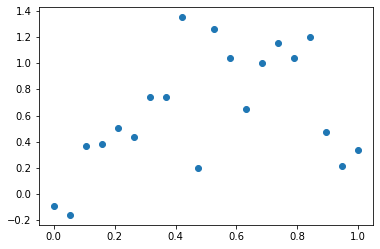

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from tools import *

N = 20
noise = 0.3
x = np.linspace(0,1,N)
y = np.sin(x*3) + noise * np.random.randn(N)

data_synth = pd.DataFrame({'x' : x, 'y' : y})

plt.scatter(x,y)

In [2]:
%run tools.py

degree = 9
likelihood = 'gaussian'

models = []

for i in range(degree):
    
    data_poly = pd.DataFrame({'y' : y})

    priors = []

    prior_a_mean = 0
    prior_a_sigma = 5
    prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

    priors.append(prior_a)
    
    if i > 0:
        expr = 'y ~ '
        for k in range(1,i+1):
            if k>1:
                expr = expr + '+'
            prior_param_mean = 0
            prior_param_sigma = 5
            prior_param = ['gaussian', [prior_param_mean, prior_param_sigma]]
            priors.append(prior_param)
            data_poly['x'+str(k)] = x**k
            expr = expr + 'x' + str(k)

    sigma_inf = 0.1
    sigma_sup = 5
    prior_sigma_unif = [sigma_inf, sigma_sup]
    prior_sigma = ['uniform', prior_sigma_unif]

    priors.append(prior_sigma)
    
    if i > 0:
        models.append(laplace_solution_regression(expr, data_poly, likelihood, priors))
    else:
        models.append(laplace_solution([1,1],[],data_poly['y'], likelihood, priors))   

      fun: 15.976527831359139
 hess_inv: array([[ 9.41968475e-03, -6.40782145e-05],
       [-6.40782145e-05,  4.74893171e-03]])
      jac: array([-2.50339508e-06, -2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 7
     njev: 14
   status: 0
  success: True
        x: array([0.64189349, 0.43717796])


/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 16.736405498563663
 hess_inv: array([[ 2.86153644e-02, -4.11465373e-02,  1.14629415e-04],
       [-4.11465373e-02,  8.09695142e-02,  2.87869644e-05],
       [ 1.14629415e-04,  2.87869644e-05,  3.92788029e-03]])
      jac: array([-2.38418579e-07,  7.15255737e-07,  9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 111
      nit: 18
     njev: 27
   status: 0
  success: True
        x: array([0.35267261, 0.57870665, 0.40016149])


/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 12.308857882519057
 hess_inv: array([[ 2.69498072e-02, -1.02197903e-01,  8.21011858e-02,
         3.77015236e-04],
       [-1.02197903e-01,  5.55646745e-01, -5.18373354e-01,
        -2.14890192e-03],
       [ 8.21011858e-02, -5.18373354e-01,  5.21686968e-01,
         2.08671711e-03],
       [ 3.77015236e-04, -2.14890192e-03,  2.08671711e-03,
         1.90053176e-03]])
      jac: array([ 1.54972076e-06,  1.19209290e-06,  9.53674316e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 182
      nit: 29
     njev: 36
   status: 0
  success: True
        x: array([-0.17797549,  3.95172972, -3.37826877,  0.27519246])
      fun: 14.035783653418097
 hess_inv: array([[ 3.05054339e-02, -1.69172379e-01,  2.69060910e-01,
        -1.30259217e-01,  1.49060697e-05],
       [-1.69172379e-01,  1.62083944e+00, -3.41036884e+00,
         1.99209665e+00,  1.00902285e-03],
       [ 2.69060910e-01, -3.41036884e+00,  8.36113503e+00,
        -5.39835033e+00, -4.59783

/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 16.382795884653614
 hess_inv: array([[ 3.45389234e-02, -1.85478130e-01,  2.39128399e-01,
         4.53741355e-03, -9.70608136e-02,  1.75084380e-04],
       [-1.85478130e-01,  1.66937832e+00, -3.18899277e+00,
         1.29299552e+00,  4.59496814e-01, -3.20091779e-03],
       [ 2.39128399e-01, -3.18899277e+00,  8.98149034e+00,
        -8.27929226e+00,  2.15324837e+00,  8.65564791e-03],
       [ 4.53741355e-03,  1.29299552e+00, -8.27929226e+00,
         1.46547387e+01, -7.74671689e+00, -6.65240628e-03],
       [-9.70608136e-02,  4.59496814e-01,  2.15324837e+00,
        -7.74671689e+00,  5.39578846e+00,  7.12744897e-04],
       [ 1.75084380e-04, -3.20091779e-03,  8.65564791e-03,
        -6.65240628e-03,  7.12744897e-04,  1.75067817e-03]])
      jac: array([-2.14576721e-06, -1.66893005e-06, -1.43051147e-06, -1.43051147e-06,
       -1.66893005e-06, -5.48362732e-06])
  message: 'Optimization terminated successfully.'
     nfev: 269
      nit: 24
     njev: 37
   status: 0
  success

/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 18.851890533374252
 hess_inv: array([[ 3.35361020e-02, -1.82723739e-01,  2.41707635e-01,
        -2.95093381e-03, -8.25678791e-02, -7.47802553e-03,
         7.61203346e-04],
       [-1.82723739e-01,  1.70826424e+00, -3.45779871e+00,
         1.28328398e+00,  1.34383396e+00, -6.72469260e-01,
        -5.16428039e-03],
       [ 2.41707635e-01, -3.45779871e+00,  1.02621652e+01,
        -7.87913858e+00, -2.87645072e+00,  3.69907343e+00,
         1.14591208e-02],
       [-2.95093381e-03,  1.28328398e+00, -7.87913858e+00,
         1.28390085e+01, -4.74395221e+00, -1.60606838e+00,
        -4.86156292e-03],
       [-8.25678791e-02,  1.34383396e+00, -2.87645072e+00,
        -4.74395221e+00,  1.50695670e+01, -8.75428735e+00,
        -7.06026806e-03],
       [-7.47802553e-03, -6.72469260e-01,  3.69907343e+00,
        -1.60606838e+00, -8.75428735e+00,  7.52919417e+00,
         5.35423384e-03],
       [ 7.61203346e-04, -5.16428039e-03,  1.14591208e-02,
        -4.86156292e-03, -7.06026806

/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 21.355407965335818
 hess_inv: array([[ 2.67455222e-02, -1.59603141e-01,  2.27675135e-01,
        -2.81393417e-03, -8.30108414e-02, -4.62954135e-02,
         3.46069247e-02,  3.31303181e-04],
       [-1.59603141e-01,  1.64555710e+00, -3.41377355e+00,
         1.05766171e+00,  1.39945402e+00,  3.96398775e-01,
        -9.17373095e-01, -5.30933863e-03],
       [ 2.27675135e-01, -3.41377355e+00,  9.99556446e+00,
        -7.04355025e+00, -2.64117262e+00,  3.22240864e-01,
         2.62218900e+00,  1.53781758e-02],
       [-2.81393417e-03,  1.05766171e+00, -7.04355025e+00,
         1.28156500e+01, -5.94536190e+00, -2.19563524e+00,
         1.22896008e+00, -4.08895101e-03],
       [-8.30108414e-02,  1.39945402e+00, -2.64117262e+00,
        -5.94536190e+00,  1.50673783e+01, -5.00845045e+00,
        -2.95410279e+00, -1.30818363e-02],
       [-4.62954135e-02,  3.96398775e-01,  3.22240864e-01,
        -2.19563524e+00, -5.00845045e+00,  1.49789890e+01,
        -8.42950845e+00, -2.33397675

/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 23.875914009706804
 hess_inv: array([[ 3.09784182e-02, -1.66915741e-01,  2.11788942e-01,
         3.98914320e-02, -9.02118288e-02, -7.02711328e-02,
        -3.38585589e-02,  7.60262041e-02,  5.73116008e-04],
       [-1.66915741e-01,  1.64267361e+00, -3.11670114e+00,
         3.19087167e-02,  1.91774526e+00,  6.75445231e-01,
         4.54701992e-01, -1.43929845e+00, -4.27468449e-03],
       [ 2.11788942e-01, -3.11670114e+00,  7.86240350e+00,
        -1.66024349e+00, -6.19362121e+00,  6.81778827e-01,
        -1.42020608e+00,  3.69235492e+00,  8.16866767e-03],
       [ 3.98914320e-02,  3.19087167e-02, -1.66024349e+00,
         2.38761525e+00,  2.42538328e+00, -4.67509350e+00,
         1.14582969e+00,  2.61881696e-01,  5.97369289e-04],
       [-9.02118288e-02,  1.91774526e+00, -6.19362121e+00,
         2.42538328e+00,  7.41524162e+00, -5.49810057e+00,
         2.03318285e+00, -2.08866299e+00, -5.12538371e-03],
       [-7.02711328e-02,  6.75445231e-01,  6.81778827e-01,
        -4

/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/envs/py397/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 26.40391837312945
 hess_inv: array([[ 3.14967614e-02, -1.77230115e-01,  2.31376578e-01,
         2.76759957e-02, -8.23815917e-02, -6.48125128e-02,
        -2.39411129e-02,  1.82438336e-02,  3.94319225e-02,
         4.20092054e-04],
       [-1.77230115e-01,  1.71082693e+00, -3.48430197e+00,
         7.54904077e-01,  1.42357649e+00,  9.21090682e-01,
        -1.63013043e-01, -6.20842007e-01, -3.78731328e-01,
        -4.91037282e-03],
       [ 2.31376578e-01, -3.48430197e+00,  1.04725433e+01,
        -6.75560541e+00, -2.81606982e+00, -2.15804482e+00,
         2.75463676e+00,  2.61452624e+00, -7.82740805e-01,
         1.05269004e-02],
       [ 2.76759957e-02,  7.54904077e-01, -6.75560541e+00,
         1.30483599e+01, -6.18485738e+00,  1.74045701e+00,
        -4.83787684e+00, -1.57604088e+00,  3.74041107e+00,
        -8.62444494e-04],
       [-8.23815917e-02,  1.42357649e+00, -2.81606982e+00,
        -6.18485738e+00,  1.60568587e+01, -5.41938339e+00,
        -2.18909110e+00, -3.13

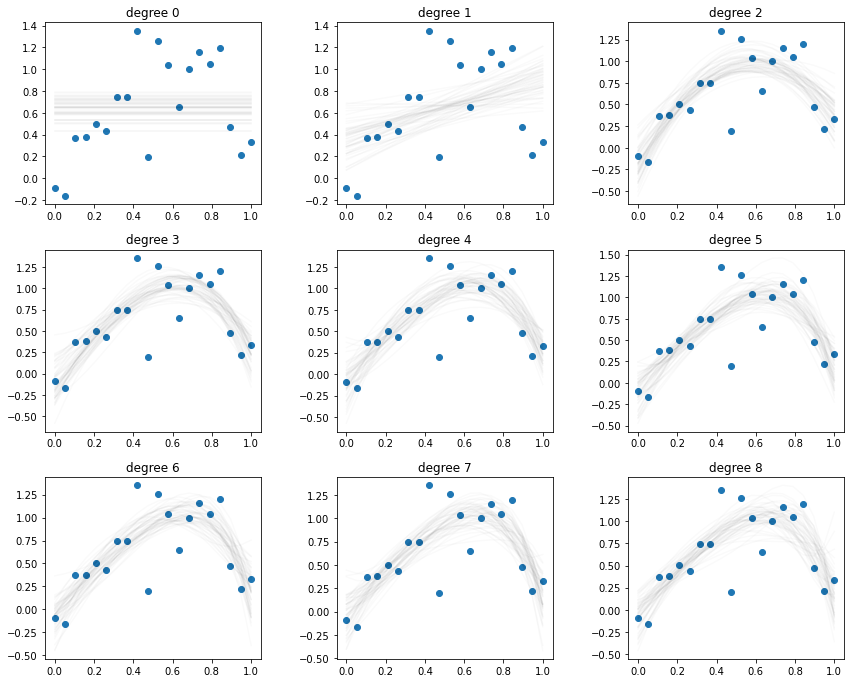

In [3]:
N_samp = 50

for i in range(degree):
    plt.subplot(int(float(degree)/3)+1,3,i+1)

    samples = post_sample_Laplace(models[i], N_samp)
    for l in range(N_samp):
        if i>0:
            pred = np.sum([x**k * samples[l,k] for k in range(i+1)],0)
        else:
            pred = x**0 * samples[l,0]
        plt.plot(x,pred, color = 'black', alpha = 0.02)
    
    plt.scatter(x,y)
    plt.title('degree ' + str(i))    
    plt.subplots_adjust(top=3, bottom=0.001, left=0.10, right=1.95, hspace=0.25,wspace=0.35)

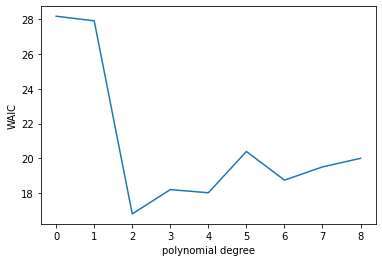

In [4]:
import scipy

WAIC = []

N_samp = 1000

for i in range(degree):
    lppd = 0
    p_waic = 0
    samples = post_sample_Laplace(models[i], N_samp)
    for k,target in enumerate(y):
        log_p = []
        for l in range(len(samples)):
            if i>0:
                pred = np.sum([x[k]**j * samples[l,j] for j in range(i+1)],0)
                log_p.append(norm.logpdf(target,pred,samples[l][-1]))
            else:
                pred = x[k]**0 * samples[l,0]
                log_p.append(norm.logpdf(target,pred,samples[l][-1]))
    
        lppd += scipy.special.logsumexp(log_p) - np.log(len(log_p))
        p_waic += np.var(log_p)
    
#    print(lppd, p_waic)
    
    WAIC.append(-2*( lppd - p_waic))   

plt.plot(range(degree),WAIC)
plt.xticks(range(degree))
plt.xlabel('polynomial degree')
plt.ylabel('WAIC')
plt.show()

**Exercise.** Compare a polynomial model of order 1 to the polynomial model of order 3 with Stan

In [5]:
import stan
import nest_asyncio as asyncio
import nest_asyncio
nest_asyncio.apply()

In [6]:
poly_model_1_code = """
data {
    int<lower=1> N;
    vector[N] y;
    vector[N] x1;
}
parameters {
    real a;
    real b1;
    real<lower=1e-4> sigma;
}
transformed parameters {
    vector[N] mu;
    mu = a + b1 * x1 ; 
}
model {
    sigma ~ cauchy(0,4);
    b1 ~ normal(0, 3);
    a ~ normal(0, 2);
    y ~ normal(mu, sigma);
}
"""


In [7]:
data_poly1 = dict(x1 = x, y = y, N=N)

In [8]:
seed = 123

posterior = stan.build(poly_model_1_code, data=data_poly1, random_seed=seed)


Building: found in cache, done.


In [9]:
fit = posterior.sample(num_chains=4, num_samples=1000)
df = fit.to_frame()
print(df.describe().T)

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!


                count      mean       std       min       25%       50%  \
parameters                                                                
lp__           4000.0  5.828544  1.251977 -2.518257  5.256794  6.127392   
accept_stat__  4000.0  0.930832  0.100092  0.092994  0.911367  0.970994   
stepsize__     4000.0  0.371092  0.008791  0.359226  0.364362  0.372540   
treedepth__    4000.0  2.756750  0.715687  1.000000  2.000000  3.000000   
n_leapfrog__   4000.0  8.800000  4.438347  1.000000  7.000000  7.000000   
divergent__    4000.0  0.000000  0.000000  0.000000  0.000000  0.000000   
energy__       4000.0 -4.343413  1.737043 -7.334045 -5.636835 -4.668962   
a              4000.0  0.356089  0.196069 -0.565662  0.233081  0.357032   
b1             4000.0  0.567990  0.336122 -0.857439  0.343515  0.571510   
sigma          4000.0  0.450812  0.077103  0.282312  0.395965  0.440778   
mu.1           4000.0  0.356089  0.196069 -0.565662  0.233081  0.357032   
mu.2           4000.0  0.

In [10]:
lppd = 0
p_waic = 0

a = fit['a'][0]
b1 = fit['b1'][0]
sigma = fit['sigma'][0]

for k,target in enumerate(y):
    log_p = []
    for l in range(len(a)):
            pred = a[l] + b1[l] * x[k] 
            log_p.append(norm.logpdf(target,pred,sigma[l]))    
    lppd += scipy.special.logsumexp(log_p) - np.log(len(log_p))
    p_waic += np.var(log_p)

In [11]:
WAIC2 = (-2 * (lppd - p_waic))
WAIC2

26.02498624272824

In [12]:
poly_model_3_code = """
data {
    int<lower=1> N;
    vector[N] y;
    vector[N] x1;
}
parameters {
    real a;
    real b1;
    real b2;
    real b3;
    real<lower=1e-4> sigma;
}
transformed parameters {
    vector[N] mu;
    mu = a + b1 * x1 + b2 * x1^2 + b3 * x1^3; 
}
model {
    sigma ~ cauchy(0,4);
    b1 ~ normal(0, 3);
    b2 ~ normal(0, 3);
    b3 ~ normal(0, 3);
    a ~ normal(0, 2);
    y ~ normal(mu, sigma);
}
"""

In [13]:
data_poly1 = dict(x1 = x, y = y, N=N)
seed = 123

posterior = stan.build(poly_model_3_code, data=data_poly1, random_seed=seed)

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:6:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_matching_dims.hpp:33:8: warning: unused variable 'error' [-Wunused-variable]
  bool error = false;
       ^
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_matching_

Building: 2.5s
Building: 2.6s
Building: 2.7s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:50:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/hmm_check.hpp:33:7: warning: unused variable 'n_transitions' [-Wunused-variable]
  int n_transitions = log_

Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:96:39: warning: lambda capture 'a' is not used [-Wunused-lambda-capture]
  

Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:54:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun.hpp:120:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include

Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.9s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:121:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/matrix_power.hpp:52:24: warning: comparison of integers of different signs: 'size_t' (aka 'unsigned long') and 'const int' [-Wsign-compare]
  for (size_t i = 2; i <= n; ++i) {
                     ~ ^  ~
In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.l

Building: 5.0s
Building: 5.1s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:153:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/simplex_constrain.hpp:40:30: warning: comparison of integers of different signs: 'Eigen::Index' (aka 'long') and 'size_t' (aka 'unsigned long') [-Wsign-compare]
  for (Eigen::Index k = 0; k < N; ++k) {
                           ~ ^ ~
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/simplex_constrain.hpp:94:30: 

Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.9s
Building: 7.0s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:11:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor.hpp:28:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor/operands_and_partials.hpp:29:1: warning: 'ops_partials_edge' defined as a class template here but previously declared as a struct template; this is valid, but may result in linker errors under the Microsoft C++ ABI [-Wmismatched-tags]
class ops_partials_edge<double, var> {
^
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include

Building: 7.1s
Building: 7.2s


/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:98:7: warning: unused variable 'n' [-Wunused-variable]
  int n = G.rows();  // number of states
      ^
In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:139:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/hmm_marginal.hpp

Building: 7.3s
Building: 7.4s
Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.8s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:307:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_lccdf.hpp:78:13: warning: unused variable 'size_sigma' [-Wu

Building: 7.9s
Building: 8.0s
Building: 8.1s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:17:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/indexing.hpp:6:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/indexing/assign.hpp:270:21: warning: comparison of integers of different signs: 'int' and 'std::__1::vector<int, std::__1::allocator<int> >::size_type' (aka 'unsigned long') [-Wsign-compare]
  for (int i = 0; i < idx.ns_.size(); ++i) {
                  ~ ^ ~~~~~~~~~~~~~~
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/indexing/assign.hpp:538:21: warning: comparison of integers of different signs: 'int' and 'std::__1::vector<int, std::__1::allocator<int> >::size_type' (aka 'unsigned long') [-Wsign-compare]
  for (int i = 0; i < col_idx.ns_

Building: 8.2s
Building: 8.3s
Building: 8.4s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:29:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_divide_equal.hpp:5:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_division.hpp:14:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_subtraction.hpp:84:21: warning: lambda capture 'b' is not used [-Wun

Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:80:21: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
      [avi = a.vi_, b](const auto& vi) mutable { avi->adj_ += vi.adj_; });
                    ^
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/grad_inc_beta.hpp:45:43: note: in instantiation of function template spe

Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_2F1_converges.hpp:5:
In file included from /Users/mlorenzi/.local/lib/python3.9/

Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_2F1_converges.hpp:5:
In file included from /Users/mlorenzi/.local/lib/python3.9/

Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 14.6s
Building: 14.7s
Building: 14.8s
Building: 14.9s
Building: 15.0s
Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.5s
Building: 15.6s
Building: 15.8s
Building: 15.9s
Building: 16.0s
Building: 16.1s
Building: 16.2s
Building: 16.3s
Building: 16.4s
Building: 16.5s
Building: 16.6s
Building: 16.7s


57 warnings generated.
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::Q2' from file 'build/temp.macosx-10.9-x86_64-3.9/Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qya4/model_mun3qya4.o' means the weak symbol cannot be overridden at runtime. This was likely caused by different translation units being compiled with different visibility settings.
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::P2' from file 'build/temp.macosx-10.9-x86_64-3.9/Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/mun3qy

In [14]:
fit = posterior.sample(num_chains=4, num_samples=1000)
df = fit.to_frame()
print(df.describe().T)


Sampling:   0%
Sampling:  10% (800/8000)
Sampling:  35% (2800/8000)
Sampling:  60% (4800/8000)
Sampling:  85% (6800/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
  Adjust your expectations accordingly!


                count       mean        std        min        25%        50%  \
parameters                                                                     
lp__           4000.0  11.528051   1.789199   0.234227  10.631960  11.905207   
accept_stat__  4000.0   0.922777   0.115311   0.008968   0.901143   0.968170   
stepsize__     4000.0   0.056787   0.011305   0.043982   0.050591   0.054116   
treedepth__    4000.0   5.253000   0.957194   1.000000   5.000000   5.000000   
n_leapfrog__   4000.0  59.333000  31.894756   1.000000  31.000000  63.000000   
divergent__    4000.0   0.000000   0.000000   0.000000   0.000000   0.000000   
energy__       4000.0  -9.010582   2.452785 -13.736717 -10.780096  -9.432919   
a              4000.0  -0.062474   0.188334  -0.815655  -0.189711  -0.068048   
b1             4000.0   2.566185   1.036234  -1.153609   1.885639   2.588692   
b2             4000.0  -0.020293   2.119261  -6.470232  -1.427533  -0.076840   
b3             4000.0  -2.166316   1.469

In [15]:
lppd = 0
p_waic = 0

a = fit['a'][0]
b1 = fit['b1'][0]
b2 = fit['b2'][0]
b3 = fit['b3'][0]
sigma = fit['sigma'][0]

for k,target in enumerate(y):
    log_p = []
    for l in range(len(a)):
            pred = a[l] + b1[l] * x[k]  +  b2[l] * x[k]**2 + b3[l] * x[k]**3
            log_p.append(norm.logpdf(target,pred,sigma[l]))    
    lppd += scipy.special.logsumexp(log_p) - np.log(len(log_p))
    p_waic += np.var(log_p)

In [16]:
WAIC3 = (-2 * (lppd - p_waic))
WAIC3

13.403814096951988

In [17]:
print('WAIC polynomial model order 2: {}'.format(WAIC2))
print('WAIC polynomial model order 3: {}'.format(WAIC3))

WAIC polynomial model order 2: 26.02498624272824
WAIC polynomial model order 3: 13.403814096951988


# Bayesian classification


In simple terms, classification implies estimating the probability of an observation to belong to a certain class, such as positive or negative, or 0 or 1. The classical model for estimating such as probability is the Binomial model:

$$ p(y) \sim Binomial(n,p), $$

where $y$ is the number of positive cases, $n$ is the total number of trials, and $p$ is the probability of a case being positive.  

As for linear regression our likelihood model was Gaussian, here our likelihood model will be Binomial. In linear regression, we were parameterizing the mean of the Gaussian model as a linear combination of the predictors:

$$ y_i \sim \mathcal{N}(\mu_i, \sigma),$$
$$ \mu_i = a + b x_i.$$

In the Binomial model, we parameterize the probability $p$ as a linear combination of the predictors:

$$y_i \sim Binomial(n, p_i)$$
$$f(p_i) = a + b x_i.$$

There are some issues to take into account. Since the probability $p_i$ must be greater than 0 and lower than 1, by parameterizing it directly with a linear model we will incour into problems, as this would not guarantee that the linear combination is bounded in the interval $[0,1]$. Therefore we need to *link* the probability $p_i$ to the linear model through some clever parameterization, called *link function*. A classical link function is called *logit* function, and is defined with respect to the log-odds:

$$f(p_i) = logit(p_i) = \log(odds(p_i)) = \log(\frac{p_i}{1-p_i}).$$

The odds is the ratio between probability of the outcome being positive and probability of being negative. Therefore is goes from 0 ($p_i=0$) to infinity ($p_i=1$). By taking the log, we transform the odds into a quantity that can range from $-\infty$ to $\infty$, a perfect variable to be described by a linear model.
We rewrite our Binomial link function:

$$ \log(\frac{p_i}{1-p_i}) = a + b x_i,$$

and we derive:

$$\frac{p_i}{1-p_i} = \exp(a + b x_i),$$
$$p_i = \frac{\exp(a + b x_i)}{1 + \exp(a + b x_i)}. $$




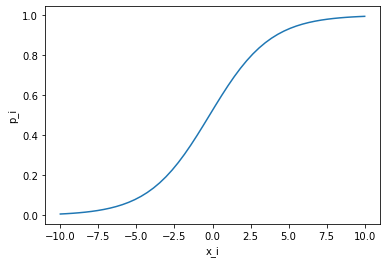

In [18]:
a = 0.1
b = 0.5

x_i = np.linspace(-10,10)

p_i = np.exp(a+b*x_i)/(1+np.exp(a+b*x_i))

plt.plot(x_i,p_i)
plt.xlabel('x_i')
plt.ylabel('p_i')
plt.show()



We recognize that the link function creates a non-linear association between $x_i$ and $p_i$, where $p_i$ is indeed bounded by 0 and 1. Importantly, although the association is linear, a unit increase in $x$ does not correspond anymore to a unit increase in the output. The magnitude of the association depends on the value of $x$ itself, and is greater in correspondence of the maximum slope of the curve. 

This kind of model is called *logistic regression*. 

## Example: Logistic regression for predicting Alzheimer's disease

In [19]:
data = pd.read_csv('adni_data')
pd.set_option('mode.chained_assignment', None) 

data_ct_ad = data.query('DX == 1 | DX == 3') 
data_ct_ad['DX'] = data_ct_ad['DX'].map({1: 0, 3: 1})

data_ct_ad['norm_brain'] = data_ct_ad['WholeBrain.bl']/data_ct_ad['ICV']
data_ct_ad['norm_brain'] = (data_ct_ad['norm_brain'] - np.mean(data_ct_ad['norm_brain']))/np.std(data_ct_ad['norm_brain'])
data_ct_ad.dropna(inplace = True)


print(data_ct_ad[:5])

   RID  APOE4  DX   AGE  WholeBrain.bl           ICV  norm_brain
0    2    0.0   0  74.3      1229738.0  1.984657e+06   -0.907716
1    3    1.0   1  81.3      1129834.0  1.920691e+06   -1.508346
3    5    0.0   0  73.7      1116633.0  1.640766e+06    0.258629
5    7    1.0   1  75.4       875798.0  1.353519e+06   -0.382669
6    8    0.0   0  84.5       948684.0  1.396068e+06    0.239182


In [20]:
binomial_model_code = """
data {
  int<lower=1> N;
  int y[N];
  real x[N];
}
parameters {
  real a;
  real b;
  real<lower=1e-4> sigma;
}
transformed parameters {
  vector[N] p_i;
  for (i in 1:N) {
    p_i[i] = exp(a + b * x[i])/(1 + exp(a + b * x[i])); 
    }
}
model {
  sigma ~ cauchy(0,4);
  b ~ normal(0, 3);
  a ~ normal(0, 3);
  y ~ binomial(1, p_i);
}
"""


In [21]:
data_to_stan = dict(x = np.array(data_ct_ad['norm_brain']), y = np.array(data_ct_ad['DX']), N = len(data_ct_ad['DX']))

seed = 123

posterior = stan.build(binomial_model_code, data=data_to_stan, random_seed=seed)

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:6:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_matching_dims.hpp:33:8: warning: unused variable 'error' [-Wunused-variable]
  bool error = false;
       ^
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_matching_

Building: 2.2s
Building: 2.3s
Building: 2.4s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:53:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err.hpp:50:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/hmm_check.hpp:33:7: warning: unused variable 'n_transitions' [-Wunused-variable]
  int n_transitions = log_

Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.2s
Building: 3.3s
Building: 3.4s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:96:39: warning: lambda capture 'a' is not used [-Wunused-lambda-capture]
  

Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:54:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun.hpp:120:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include

Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:121:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/matrix_power.hpp:52:24: warning: comparison of integers of different signs: 'size_t' (aka 'unsigned long') and 'const int' [-Wsign-compare]
  for (size_t i = 2; i <= n; ++i) {
                     ~ ^  ~
In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.l

Building: 4.6s
Building: 4.7s
Building: 4.8s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:153:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/simplex_constrain.hpp:40:30: warning: comparison of integers of different signs: 'Eigen::Index' (aka 'long') and 'size_t' (aka 'unsigned long') [-Wsign-compare]
  for (Eigen::Index k = 0; k < N; ++k) {
                           ~ ^ ~
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/simplex_constrain.hpp:94:30: 

Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:11:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor.hpp:28:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/functor/operands_and_partials.hpp:29:1: warning: 'ops_partials_edge' defined as a class template here but previously declared as a struct template; this is valid, but may result in linker errors under the Microsoft C++ ABI [-Wmismatched-tags]
class ops_partials_edge<double, var> {
^
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include

Building: 6.8s
Building: 6.9s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:128:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:41:21: warning: comparison of integers of different signs: 'int' and 'size_t' (aka 'unsigned long') [-Wsign-compare]
  for (int i = 0; i < M; i++) {
                  ~ ^ ~
/Users/mlorenzi/.local/lib/python3.

Building: 7.0s
Building: 7.2s
Building: 7.3s
Building: 7.4s
Building: 7.5s
Building: 7.6s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:13:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:307:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_lccdf.hpp:78:13: warning: unused variable 'size_sigma' [-Wu

Building: 7.7s
Building: 7.8s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:17:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/indexing.hpp:6:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/indexing/assign.hpp:270:21: warning: comparison of integers of different signs: 'int' and 'std::__1::vector<int, std::__1::allocator<int> >::size_type' (aka 'unsigned long') [-Wsign-compare]
  for (int i = 0; i < idx.ns_.size(); ++i) {
                  ~ ^ ~~~~~~~~~~~~~~
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/indexing/assign.hpp:538:21: warning: comparison of integers of different signs: 'int' and 'std::__1::vector<int, std::__1::allocator<int> >::size_type' (aka 'unsigned long') [-Wsign-compare]
  for (int i = 0; i < col_idx.ns_

Building: 7.9s
Building: 8.0s
Building: 8.1s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:29:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_divide_equal.hpp:5:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_division.hpp:14:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_subtraction.hpp:84:21: warning: lambda capture 'b' is not used [-Wun

Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:80:21: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
      [avi = a.vi_, b](const auto& vi) mutable { avi->adj_ += vi.adj_; });
                    ^
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/grad_inc_beta.hpp:45:43: note: in instantiation of function template spe

Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:94:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/lb_constrain.hpp:114:33: warning: lambda capture 'lp' is not used [-Wunused-lambda-capture]
                               [lp, arena_lb = var(lb)](auto& vi) mutable {
                                ^
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/io/deserializer.hpp:386:26: note: in instantiation of function template spec

Building: 9.9s
Building: 10.0s
Building: 10.1s


In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:58:
/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/set_zero_all_adjoints.hpp:14:13: warning: 'static' function 'set_zero_all_adjoints' declared in header file should be declared 'static inline' [-Wunneeded-internal-declaration]
static void set_zero_all_adjoints() {
            ^
In file included from /Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.cpp:2:
In file include

Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 14.6s


54 warnings generated.
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::Q2' from file 'build/temp.macosx-10.9-x86_64-3.9/Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w6p/model_3hn72w6p.o' means the weak symbol cannot be overridden at runtime. This was likely caused by different translation units being compiled with different visibility settings.
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/Users/mlorenzi/.local/lib/python3.9/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::P2' from file 'build/temp.macosx-10.9-x86_64-3.9/Users/mlorenzi/Library/Caches/httpstan/4.6.1/models/3hn72w

In [22]:
fit = posterior.sample(num_chains=4, num_samples=1000)
df = fit.to_frame()
print(df.describe().T[:10])

Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   1% (102/8000)
Sampling:   3% (202/8000)
Sampling:   9% (701/8000)
Sampling:  14% (1100/8000)
Sampling:  20% (1600/8000)
Sampling:  26% (2100/8000)
Sampling:  45% (3600/8000)
Sampling:  65% (5200/8000)
Sampling:  82% (6600/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.000328 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.28 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: binomial_lpmf: Probability parameter[1] is nan, but must be in the interval [0, 1] (in '/var/folders/y1/mqwffwx97cqcz6jq_cr4twmc0000gn/T/httpstan_9ynw2bbr/model_3hn72w6p.stan', line 22, column 2 to column 23)
  If this warning occurs sporadically, such as for highly constrained variable types like covarianc

                count        mean         std         min         25%  \
parameters                                                              
lp__           4000.0 -460.237623    1.365988 -471.539303 -460.851657   
accept_stat__  4000.0    0.904429    0.124743    0.157358    0.867501   
stepsize__     4000.0    0.718066    0.096012    0.563191    0.675706   
treedepth__    4000.0    2.298500    0.549521    1.000000    2.000000   
n_leapfrog__   4000.0    4.952500    2.075047    1.000000    3.000000   
divergent__    4000.0    0.000000    0.000000    0.000000    0.000000   
energy__       4000.0  461.745070    1.856741  458.665736  460.408593   
a              4000.0   -0.579767    0.083571   -0.876970   -0.635665   
b              4000.0   -1.146757    0.098692   -1.652032   -1.210828   
sigma          4000.0   33.829250  542.130246    0.001877    1.731538   

                      50%         75%           max  
parameters                                           
lp__          -

In [23]:
est_a = fit['a'][0]
quantiles_a = np.quantile(est_a, [0.05, 0.5, 0.95])

est_b = fit['b'][0]
quantiles_b = np.quantile(est_b, [0.05, 0.5, 0.95])

logistic_a_50 = np.exp(quantiles_a[1])/(1 + np.exp(quantiles_a[1]))
logistic_a_5 = np.exp(quantiles_a[0])/(1 + np.exp(quantiles_a[0]))
logistic_a_95 = np.exp(quantiles_a[2])/(1 + np.exp(quantiles_a[2]))

print('Baseline probability of disease: \n')
print('5%  :', logistic_a_5)
print('50% :', logistic_a_50)
print('95% :', logistic_a_95)


logistic_b_95 = np.exp(quantiles_a[0] - quantiles_b[0])/(1 + np.exp(quantiles_a[0] - quantiles_b[0]))
logistic_b_50 = np.exp(quantiles_a[0] - quantiles_b[1])/(1 + np.exp(quantiles_a[0] - quantiles_b[1]))
logistic_b_5 = np.exp(quantiles_a[0] - quantiles_b[2])/(1 + np.exp(quantiles_a[0] - quantiles_b[2]))


print('Probability increase for unit decrease in standardized brain volume (parameter "a" at lowest quantile): \n')
print('5%  :', logistic_b_5)
print('50% :', logistic_b_50)
print('95% :', logistic_b_95)

Baseline probability of disease: 

5%  : 0.3274500040090293
50% : 0.3592050379730592
95% : 0.39150916163894456
Probability increase for unit decrease in standardized brain volume (parameter "a" at lowest quantile): 

5%  : 0.5672324162087219
50% : 0.6048767701946721
95% : 0.6433213274931673


In [24]:
p_i = fit['p_i']
print(p_i.shape)

(826, 4000)


In [25]:

lppd = []
pwaic = []
for i in range(len(data_ct_ad)):
    id_log_lik = []
    for k in range(1000):
        p = p_i[i,k]
        id_log_lik.append(scipy.stats.binom.logpmf(data_ct_ad['DX'].values[i], 1, p))
    lppd.append(scipy.special.logsumexp(id_log_lik) - np.log(len(id_log_lik)))
    pwaic.append(np.var(id_log_lik))

waic = -2 * (np.sum(lppd) -np.sum(pwaic))

What happens when we include another predictor, for example the presence of the genetic mutation APOE4?

In [26]:
binomial_model_code_2 = """
data {
  int<lower=1> N;
  int y[N];
  real x[N];
  real x_g[N];
}
parameters {
  real a;
  real b;
  real c;
  real<lower=1e-4> sigma;
}
transformed parameters {
  vector[N] p_i;
  for (i in 1:N) {
    p_i[i] = exp(a + b * x[i] + c * x_g[i])/(1 + exp(a + b * x[i] + c * x_g[i])); 
    }
}
model {
  sigma ~ cauchy(0,4);
  c ~ normal(0, 3);
  b ~ normal(0, 3);
  a ~ normal(0, 3);
  y ~ binomial(1, p_i);
}
"""

In [27]:
data_to_stan = dict(x_b = data_ct_ad['norm_brain'],  
                    y = data_ct_ad['DX'], 
                    mu_a = 0, std_a = 10, mu_b = 0, std_b = 10,  mu_c = 0, std_c = 10, 
                    N = len(data_ct_ad['DX']))

data_to_stan = dict(x = np.array(data_ct_ad['norm_brain']), 
                    x_g = np.array(data_ct_ad['APOE4']),
                    y = np.array(data_ct_ad['DX']), 
                    N = len(data_ct_ad['DX']))

seed = 123

posterior = stan.build(binomial_model_code_2, data=data_to_stan, random_seed=seed)

Building: found in cache, done.


In [28]:
fit = posterior.sample(num_chains=4, num_samples=1000)
df = fit.to_frame()
print(df.describe().T[:10])

Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   4% (303/8000)
Sampling:   6% (502/8000)
Sampling:   9% (701/8000)
Sampling:  12% (1000/8000)
Sampling:  16% (1300/8000)
Sampling:  20% (1600/8000)
Sampling:  24% (1900/8000)
Sampling:  28% (2200/8000)
Sampling:  31% (2500/8000)
Sampling:  35% (2800/8000)
Sampling:  54% (4300/8000)
Sampling:  71% (5700/8000)
Sampling:  85% (6800/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 0.000366 seconds
  1000 transitions using 10 leapfrog steps per transition would take 3.66 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: binomial_lpmf: Probability parameter[2] is nan, but must be in the interval [0, 1] (in '/var/folders/y1/mqwffwx97cqcz6jq_cr4twmc0000gn/T/httpstan_e1jvdc

                count        mean       std         min         25%  \
parameters                                                            
lp__           4000.0 -390.089699  1.561594 -398.177980 -390.902679   
accept_stat__  4000.0    0.910640  0.112437    0.156625    0.875203   
stepsize__     4000.0    0.529743  0.048288    0.475792    0.487549   
treedepth__    4000.0    2.583000  0.548804    1.000000    2.000000   
n_leapfrog__   4000.0    6.497000  2.770363    1.000000    7.000000   
divergent__    4000.0    0.000000  0.000000    0.000000    0.000000   
energy__       4000.0  392.074522  2.110012  387.946297  390.506184   
a              4000.0   -1.470587  0.125200   -1.896567   -1.551741   
b              4000.0   -1.246117  0.106440   -1.622979   -1.316754   
c              4000.0    1.571084  0.147126    1.008866    1.470565   

                      50%         75%         max  
parameters                                         
lp__          -389.718233 -388.930141 -387.

Is this model better fitting the diagnosis than the previous one?

In [29]:
p_i = fit['p_i']

lppd = []
pwaic = []
for i in range(len(data_ct_ad)):
    id_log_lik = []
    for k in range(1000):
        p = p_i[i,k]
        id_log_lik.append(scipy.stats.binom.logpmf(data_ct_ad['DX'].values[i], 1, p))
    lppd.append(scipy.special.logsumexp(id_log_lik) - np.log(len(id_log_lik)))
    pwaic.append(np.var(id_log_lik))

waic_apoe = -2 * (np.sum(lppd) -np.sum(pwaic))

In [30]:
print(waic, waic_apoe)

922.7468726557128 782.5044276915794
